## Predicting House Prices, Rent Prices, and Cap Rates in Israel 📈

<a ></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Table of contents</div>

* [1. Introduction](#1) 
    
* [2. Import Libraries](#2)
    
* [3. Attributes](#3)
    
* [4. Data Preprocessing](#4)
    
* [5. Data Analysis](#5)
    
* [6. Model Training](#6)
    
* [7. Conclusion](#7)   

<a id="1"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">1. Introduction</div>

- The prediction of house prices is a crucial task in the real estate market, as it allows both buyers and sellers to make informed decisions. In the context of Israel, where the housing market is dynamic and constantly evolving, accurate price predictions can significantly impact individuals, investors, and the overall economy. In this Jupyter notebook, we delve into the realm of predicting house prices in Israel, utilizing advanced machine learning techniques to analyze various factors that influence property values.

- This dataset comprises from houses captured at websites like yad2 and ad.co.il. It's a classic dataset to explore and understand how to solve regression problem.

- Our goal: predict where is the most profitable place to buy and rent a house

<a id="2"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">2. Import libraries 📚</div>

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
import seaborn as sns


import warnings# warning filter
warnings.filterwarnings("ignore")
%matplotlib inline

<a id="3"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">3. Attributes 📋</div>

The dataset has **98328** rows and **15 columns**

| Column Name     | Data type |
|-----------------|-----------|
| `City`          | object    |
| `neighborhood	` | object    |                           
| `house type`    | object    |                           
| `house_area`    | float     |                              
| `garden_area`   | float     |                 
| `rooms`         | float     |               
| `balconies`     | float     | 
| `parking`       | binary    |             
| `protected_room`| binary    |                        
| `elevator`      | binary    |                  
| `renovated`     | binary    |                                    
| `furniture`     | binary    |                 
| `accessibility` | binary    |                 
| `bars`          | binary    |    
| `price`         | binary    |            

                                            

In [2]:
df = pd.read_csv('../tables/rent.csv')
df.head()
df = df.drop(df[df['rooms'] == 'לא צוין'].index)
df['rooms'] = df['rooms'].str.replace(',', '.')
df['rooms'] = df['rooms'].astype(float)

In [3]:
df.describe()

,house_area,garden_area,rooms,balconies,air_condition,parking,protected_room,elevator,renovated,furniture,accessibility,bars,storage,price
count,9.832800e+04,9.832000e+04,65331.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,98328.000000,9.832800e+04
mean,3.631105e+02,6.108562e+03,3.725077,0.707388,0.905439,0.594968,0.400598,0.431240,0.530134,0.359836,0.347927,0.254017,0.272435,6.712326e+03
std,3.152277e+04,1.907266e+06,8.641889,0.731743,0.292609,0.490901,0.490022,0.495252,0.499094,0.479955,0.476315,0.435310,0.445215,3.650377e+04
min,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,6.200000e+01,0.000000e+00,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000e+03
50%,9.000000e+01,0.000000e+00,3.500000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.900000e+03
75%,1.300000e+02,0.000000e+00,4.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.800000e+03
max,7.777222e+06,5.980427e+08,900.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.111111e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98328 entries, 0 to 98532
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            98325 non-null  object 
 1   neighborhood    91643 non-null  object 
 2   house type      98328 non-null  object 
 3   house_area      98328 non-null  int64  
 4   garden_area     98320 non-null  float64
 5   rooms           65331 non-null  float64
 6   balconies       98328 non-null  int64  
 7   air_condition   98328 non-null  int64  
 8   parking         98328 non-null  int64  
 9   protected_room  98328 non-null  int64  
 10  elevator        98328 non-null  int64  
 11  renovated       98328 non-null  int64  
 12  furniture       98328 non-null  int64  
 13  accessibility   98328 non-null  int64  
 14  bars            98328 non-null  int64  
 15  storage         98328 non-null  int64  
 16  price           98328 non-null  int64  
dtypes: float64(2), int64(12), objec

In [5]:
df.apply(lambda x: len(x.unique()))

city               845
neighborhood      1571
house type          96
house_area         571
garden_area        346
rooms               32
balconies            6
air_condition        2
parking              2
protected_room       2
elevator             2
renovated            2
furniture            2
accessibility        2
bars                 2
storage              2
price              892
dtype: int64

In [6]:
df['price'].describe()

count    9.832800e+04
mean     6.712326e+03
std      3.650377e+04
min      0.000000e+00
25%      3.250000e+03
50%      4.900000e+03
75%      7.800000e+03
max      1.111111e+07
Name: price, dtype: float64

<a id="4"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">4. Data Preprocessing 💻</div>

In [7]:
df.isnull().sum()

city                  3
neighborhood       6685
house type            0
house_area            0
garden_area           8
rooms             32997
balconies             0
air_condition         0
parking               0
protected_room        0
elevator              0
renovated             0
furniture             0
accessibility         0
bars                  0
storage               0
price                 0
dtype: int64

In [8]:
df = df.drop(columns=['neighborhood'])
df = df.dropna()

In [9]:
df[df.duplicated()].shape[0]

42345

In [10]:
df = df.drop_duplicates()

In [11]:
not_to_small = df["house_area"] > 15
not_to_big = df["house_area"] < 500
garden_not_to_big = df["garden_area"] < 1000
garden_not_to_small = df["garden_area"] >= 0

df = df.where(not_to_small & not_to_big & garden_not_to_big & garden_not_to_small ).dropna()

In [12]:
not_to_cheap = df["price"] > 1000
not_to_expensive= df["price"] < 20000

df = df.where(not_to_cheap & not_to_expensive).dropna()

not_to_little_rooms = df["rooms"] >= 2
not_to_many_rooms = df["rooms"] <= 10
df = df.where ( not_to_little_rooms & not_to_little_rooms ).dropna()

In [13]:
df['house type'].unique()

array(['דירה', 'בית פרטי/קוטג', 'יחידת דיור', 'גג/פנטהאוז', 'דירת גן',
       'סטודיו/לופט', 'השכרה\xa0לאילת', 'דופלקס', 'סאבלט', 'דו משפחתי',
       'דירת גג', 'מרתף/פרטר', 'בית פרטי', 'קראוון', 'כללי', 'קוטג',
       'פנטהאוז', 'Квартира', 'פרטי/קוטג', 'דיור מוגן',
       'מבנים ניידים/קרוואן', 'תיירות ונופש', 'בניין מגורים', 'דירת נופש',
       'משק חקלאי/נחלה', 'טריפלקס', 'מחסן', 'Chung cư', 'מגרש למגורים',
       'דירת סטודיו', 'פרטי/קוטג להשכרה בירושלים', 'דירה להשכרה בירושלים',
       'דירה להשכרה ברמת גן', 'דירה&nbsp;', 'דירה להשכרה בהרצליה (תיווך)',
       'דירה להשכרה בתל אביב יפו (תיווך)',
       'דירת גן להשכרה בתל אביב יפו (תיווך)',
       'יחידת דיור להשכרה באשקלון (תיווך)', 'דירה להשכרה',
       'דו משפחתי להשכרה', 'פרטי/קוטג להשכרה', 'דירת גן להשכרה',
       'גג/פנטהאוז להשכרה', 'יחידת דיור להשכרה',
       'סטודיו/לופט להשכרה בתל אביב יפו (תיווך)',
       'דירה להשכרה בבאר שבע (תיווך)', 'סטודיו/לופט להשכרה',
       "בית פרטי/קוטג'"], dtype=object)

In [14]:
df['house type'] = df['house type'].str.replace('&nbsp;', '')
df['house type'] = df['house type'].str.replace('/קוטג', '')
df['house type'] = df['house type'].str.replace("'", '')

In [15]:
df['house type'].unique()

array(['דירה', 'בית פרטי', 'יחידת דיור', 'גג/פנטהאוז', 'דירת גן',
       'סטודיו/לופט', 'השכרה\xa0לאילת', 'דופלקס', 'סאבלט', 'דו משפחתי',
       'דירת גג', 'מרתף/פרטר', 'קראוון', 'כללי', 'קוטג', 'פנטהאוז',
       'Квартира', 'פרטי', 'דיור מוגן', 'מבנים ניידים/קרוואן',
       'תיירות ונופש', 'בניין מגורים', 'דירת נופש', 'משק חקלאי/נחלה',
       'טריפלקס', 'מחסן', 'Chung cư', 'מגרש למגורים', 'דירת סטודיו',
       'פרטי להשכרה בירושלים', 'דירה להשכרה בירושלים',
       'דירה להשכרה ברמת גן', 'דירה להשכרה בהרצליה (תיווך)',
       'דירה להשכרה בתל אביב יפו (תיווך)',
       'דירת גן להשכרה בתל אביב יפו (תיווך)',
       'יחידת דיור להשכרה באשקלון (תיווך)', 'דירה להשכרה',
       'דו משפחתי להשכרה', 'פרטי להשכרה', 'דירת גן להשכרה',
       'גג/פנטהאוז להשכרה', 'יחידת דיור להשכרה',
       'סטודיו/לופט להשכרה בתל אביב יפו (תיווך)',
       'דירה להשכרה בבאר שבע (תיווך)', 'סטודיו/לופט להשכרה'], dtype=object)

In [16]:
house_type_counts = df['house type'].value_counts().sort_values(ascending=False)
print(house_type_counts)

דירה                                       13924
יחידת דיור                                  1337
בית פרטי                                    1090
דירת גן                                      899
גג/פנטהאוז                                   753
דו משפחתי                                    288
דופלקס                                       256
פרטי                                         128
דירה להשכרה                                   77
מרתף/פרטר                                     62
תיירות ונופש                                  49
סאבלט                                         39
סטודיו/לופט                                   30
כללי                                          21
השכרה לאילת                                   11
דירת גג                                        8
פרטי להשכרה                                    7
דיור מוגן                                      7
טריפלקס                                        7
גג/פנטהאוז להשכרה                              6
דירת גן להשכרה      

In [17]:
types_to_keep = ['דירה', 'בית פרטי', 'דירת גן', 'גג/פנטהאוז', 'דו משפחתי', 'דופלקס', 'פרטי']
df = df[df['house type'].isin(types_to_keep)]

In [18]:
list_to_replace = ['דירה', 'בית פרטי', 'דירת גן', 'גג/פנטהאוז', 'דו משפחתי', 'דופלקס', 'פרטי']
replce_with = ['apartment', 'private house', 'garden apartment', 'penthouse', 'dual family', 'duplex', 'private house' ]
df = df.replace(to_replace =list_to_replace, value =replce_with)

In [19]:
house_type_counts = df['house type'].value_counts().sort_values(ascending=False)
print(house_type_counts)

apartment           13924
private house        1218
garden apartment      899
penthouse             753
dual family           288
duplex                256
Name: house type, dtype: int64


In [20]:
city_counts = df['city'].value_counts()
top_10_cities = city_counts.head(10)
print(top_10_cities)

תל אביב יפו    3035
באר שבע        1119
ירושלים         797
רמת גן          726
חיפה            717
אשקלון          623
ראשון לציון     576
נתניה           553
חולון           485
הרצליה          461
Name: city, dtype: int64


In [22]:
list_to_replace = ['תל אביב יפו', 'ירושלים', 'חיפה', 'באר שבע', 'רמת גן', 'נתניה', 'פתח תקווה', 'ראשון לציון', 'אשדוד', 'אשקלון']
replce_with = ['tel aviv', 'jerusalem', 'haifa', 'beer sheva', 'ramat gan', 'natanya', 'petah tikva', 'rishon lezion', 'ashdod', 'ashkelon']
df = df.replace(to_replace =list_to_replace, value =replce_with)

In [23]:
df = df[df['city'].isin(replce_with)]

<a id="5"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">5. Data Analysis 📊 </div>

<Axes: xlabel='price', ylabel='Density'>

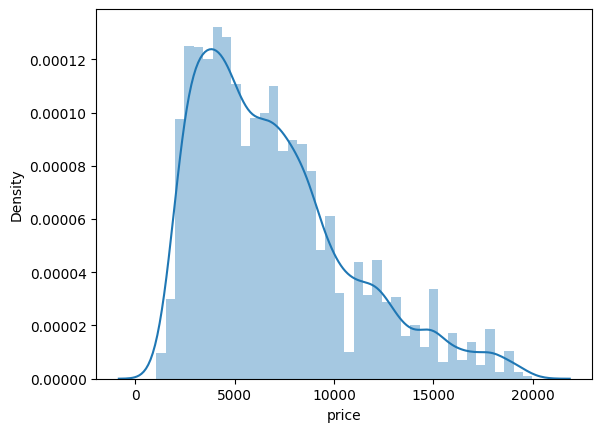

In [25]:
sns.distplot(df['price'])

Text(0.5, 1.0, 'Home Price: $\\mu=6965$, $\\sigma=3861$')

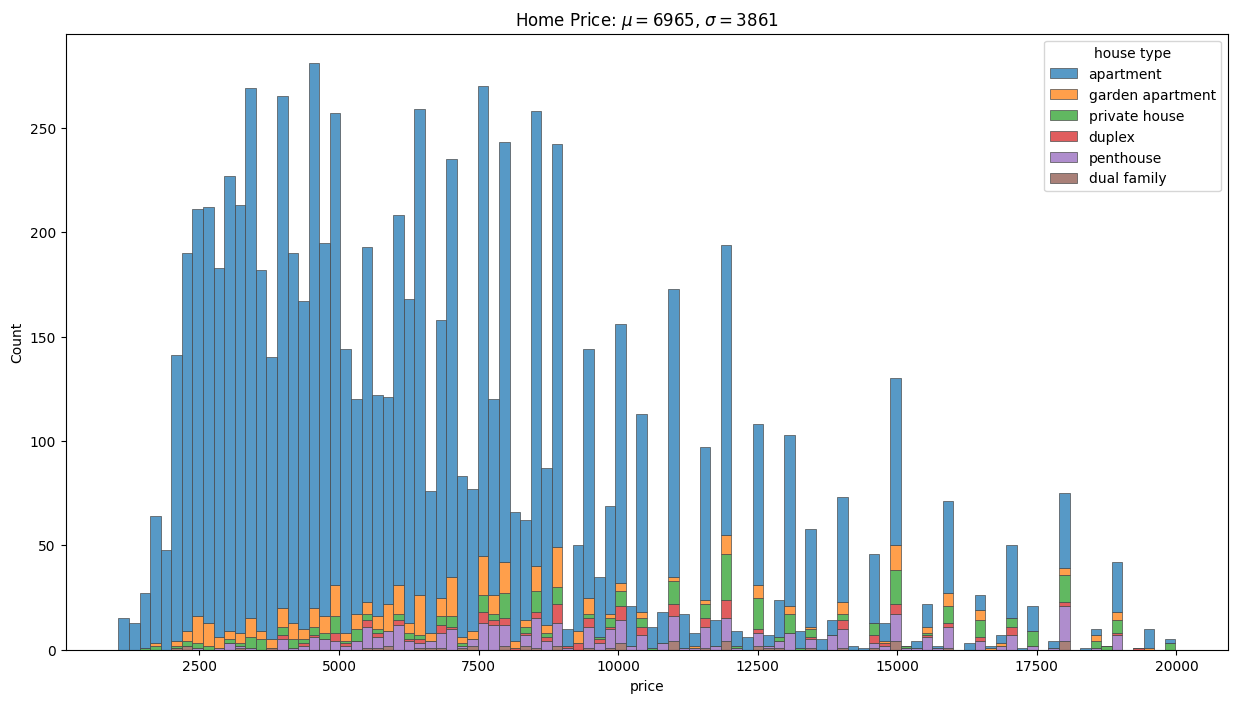

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(df, x="price", hue="house type", multiple="stack", palette="tab10", edgecolor=".3", linewidth=.5, bins = 100 )

# get the mean and the standard devation value of home price
mean = df['price'].mean()
std =  df['price'].std()
plt.title(r'Home Price: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

Text(0.5, 1.0, 'Home size: $\\mu=100$, $\\sigma=49$')

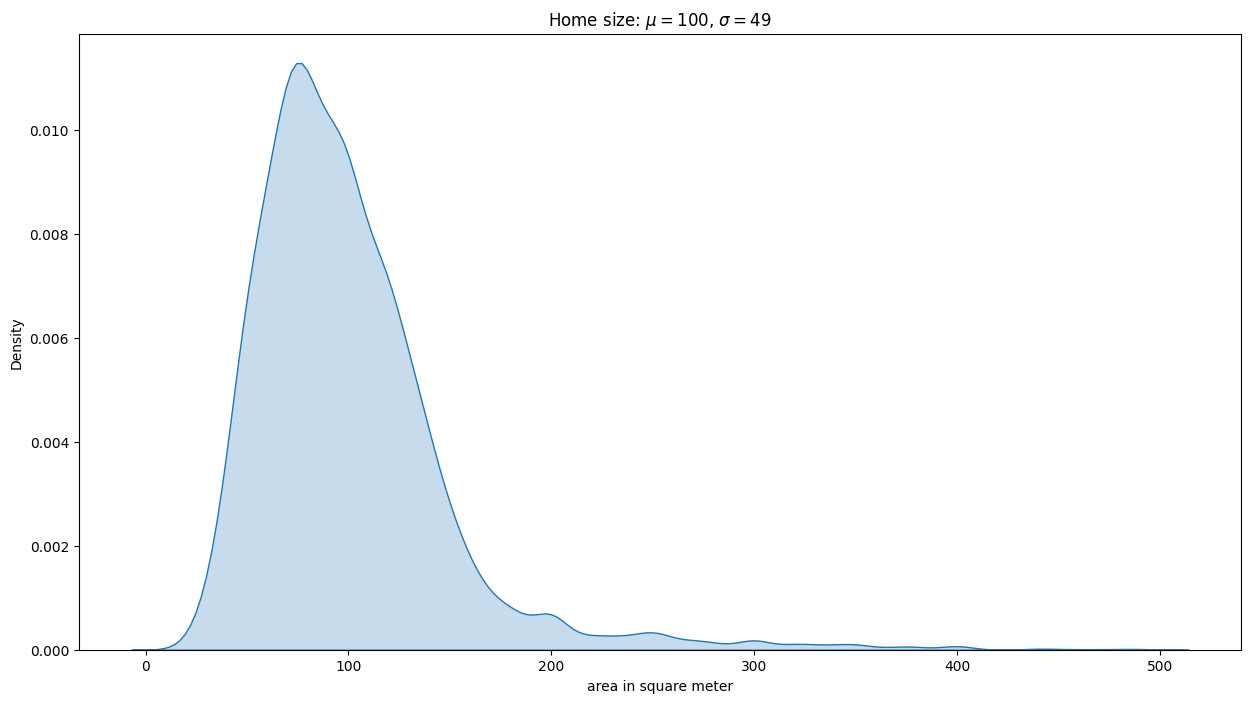

In [27]:
plt.figure(figsize=(15,8))
sns.kdeplot(df.house_area,  shade=True)
plt.xlabel('area in square meter')

mean = df['house_area'].mean()
std =  df['house_area'].std()
plt.title(r'Home size: $\mu='+str(round(mean))+'$, $\sigma=' +str(round(std))+'$')

In [28]:
num_col = df.select_dtypes('number').columns.to_list()
num_col.pop() # remove the column Purchase
cat_col = df.select_dtypes('object').columns.to_list()
df_cat = df[cat_col]
df_num = df[num_col]

Text(0.5, 1.0, 'average price by city')

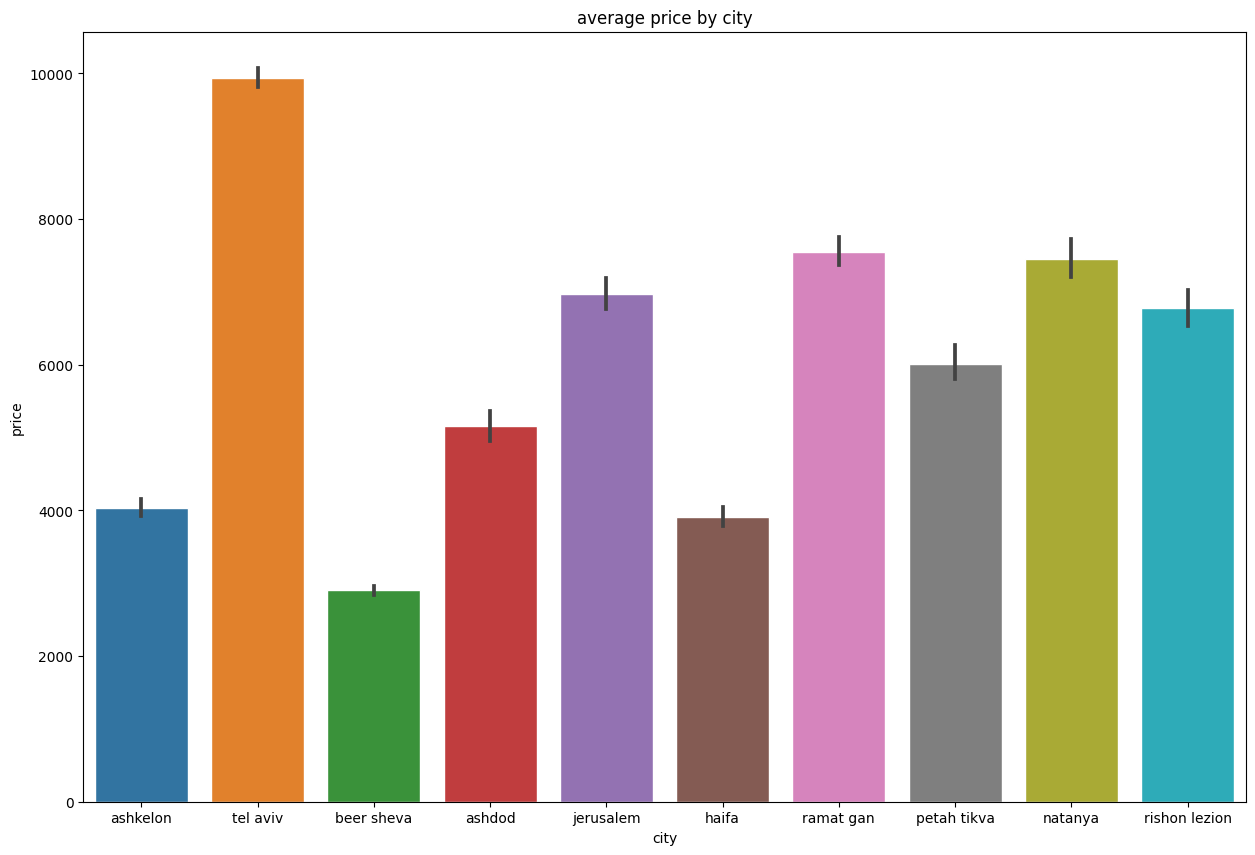

In [29]:
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'price' , data = df, edgecolor = 'w').set_title('average price by city')

Text(0.5, 1.0, 'average price for squre meter by city and')

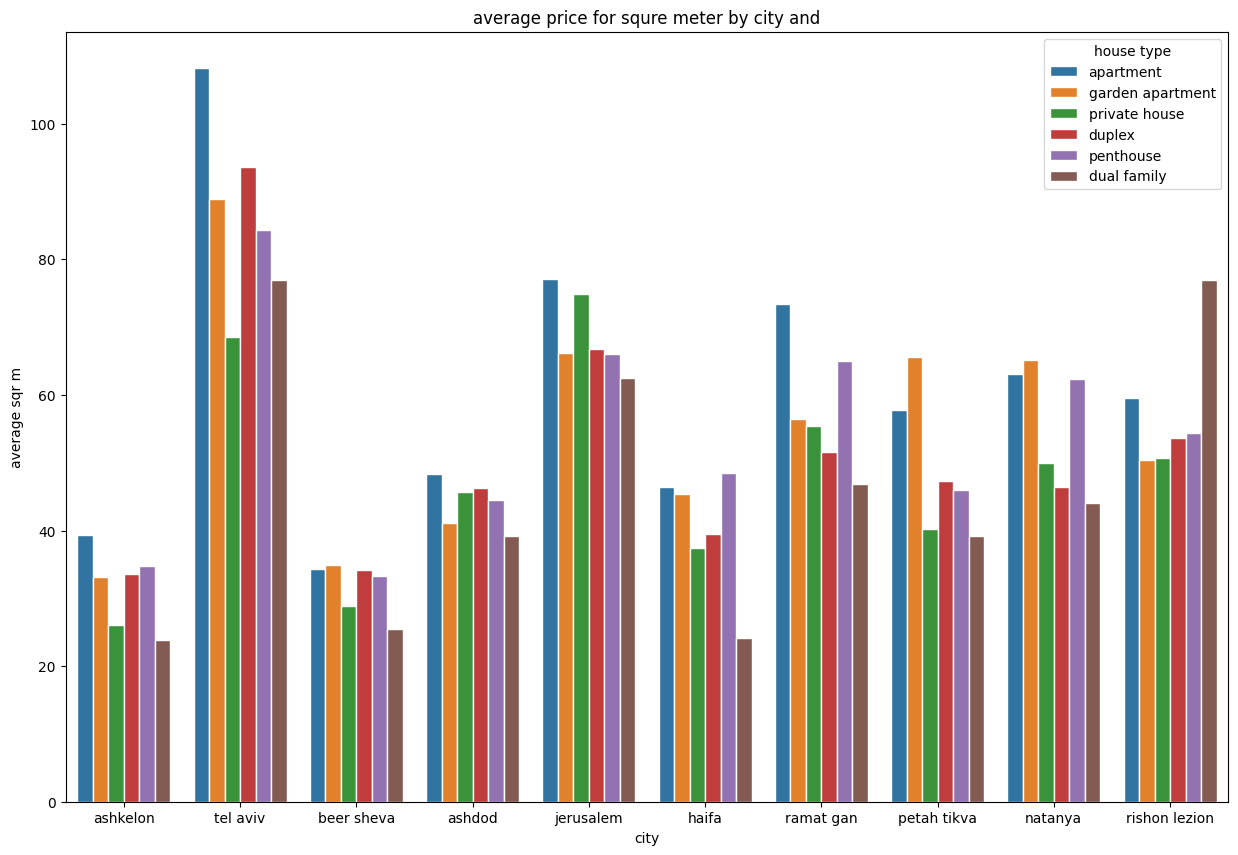

In [30]:
#founfing average size and average price
average_area = df.groupby(['city','house type'])["house_area"].mean()
average_area = average_area.to_frame()
average_area.columns = ['average area']

average_price = df.groupby(['city','house type'])["price"].mean()
average_price = average_price.to_frame()
average_price.columns = ['average price']

# merging
df_avg = pd.merge(average_price,average_area,on=['city','house type'])
df_popular_cities = pd.merge(df, df_avg, on=['city','house type'])
df_popular_cities["average sqr m"] =df_popular_cities["average price"] / df_popular_cities["average area"]

#ploting
plt.figure(figsize=(15, 10))
sns.barplot(x = 'city', y = 'average sqr m' , hue = "house type", data = df_popular_cities, edgecolor = 'w').set_title('average price for squre meter by city and')

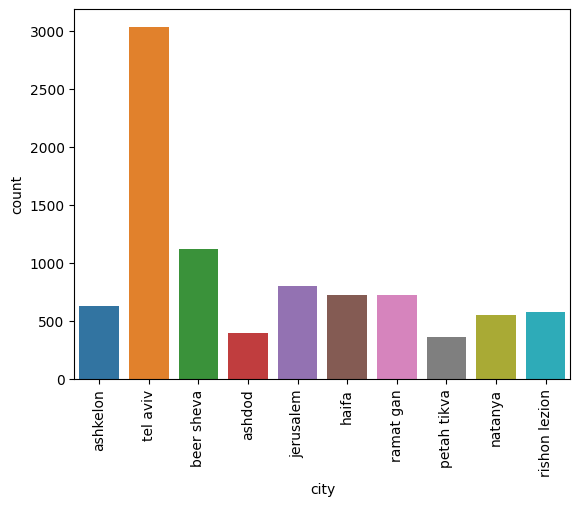

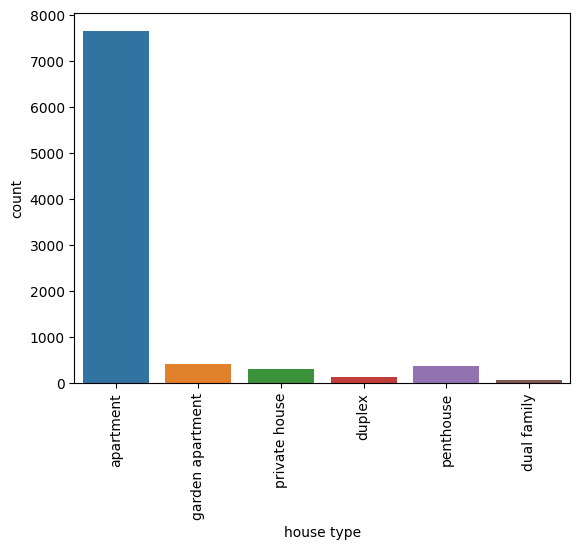

In [31]:
for col in cat_col:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=90)
    plt.show()

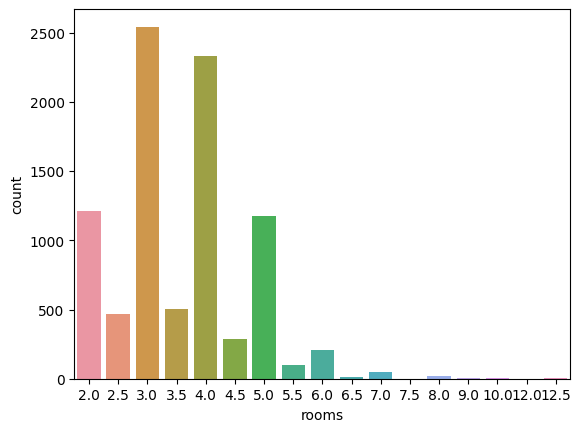

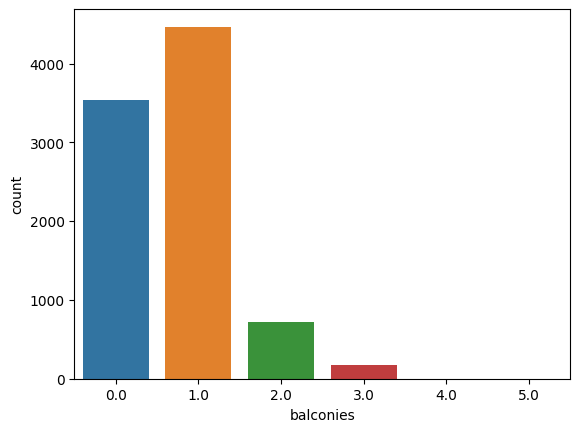

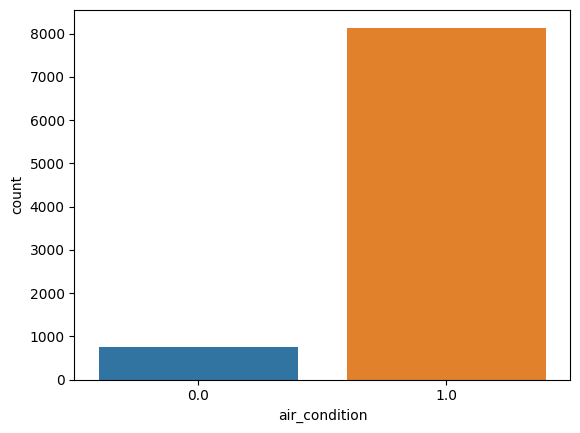

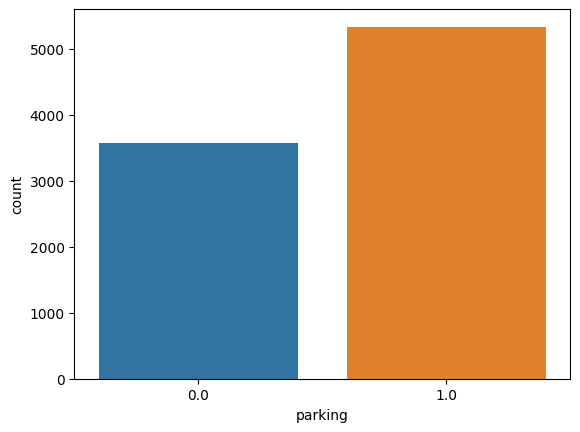

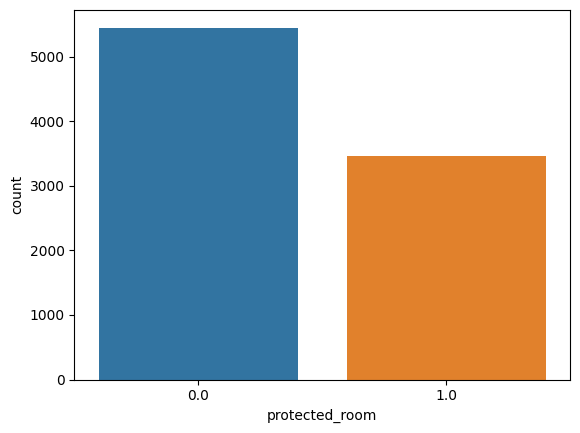

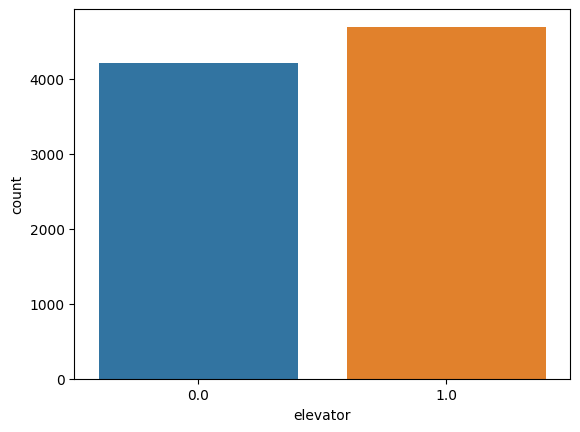

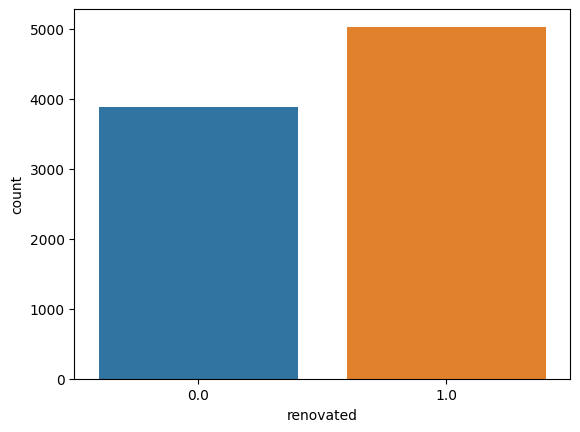

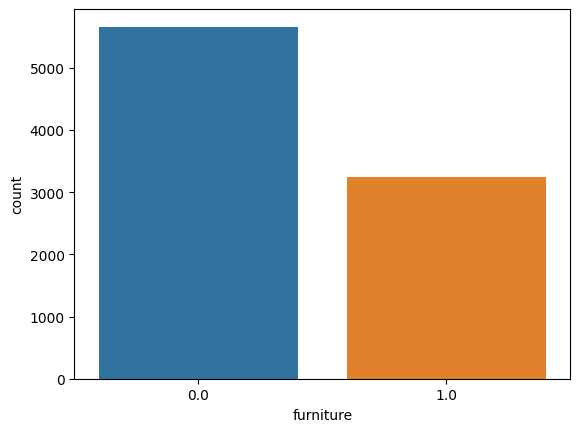

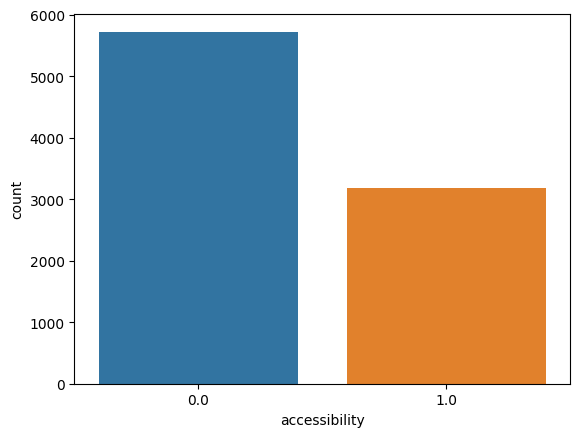

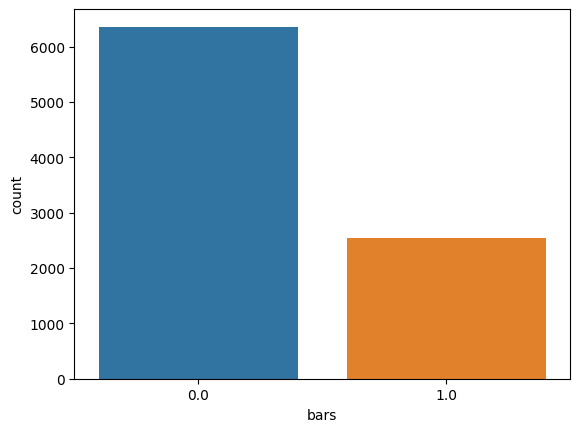

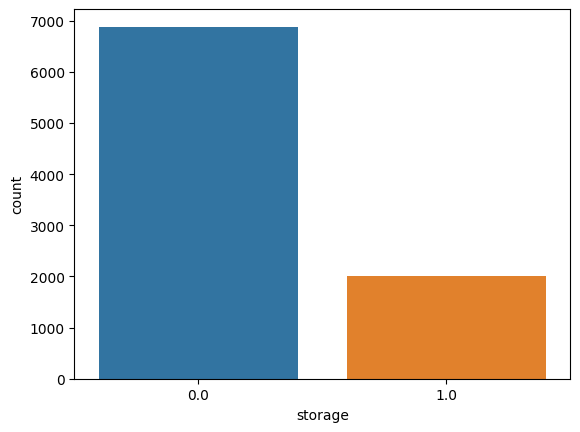

In [32]:
for col in num_col:
    if col != 'house_area' and col != 'garden_area':
        sns.countplot(x=col, data=df)
        plt.show()

<Axes: >

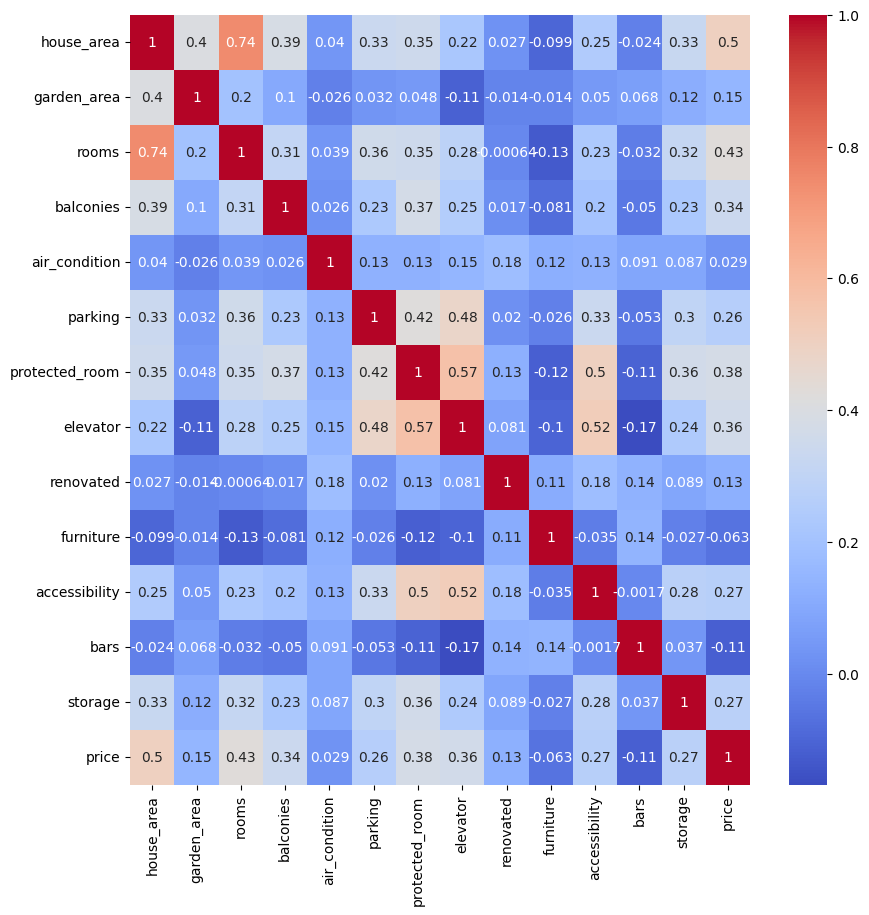

In [33]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<a id="6"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">6. Model Training</div>

In [34]:
city_encoder = LabelEncoder()
house_type_encoder = LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])
df['house type'] = house_type_encoder.fit_transform(df['house type'])

In [35]:
X = df.drop('price', axis=1)
y = np.log(df['price']) #normalize dependent variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## finding the best model

In [36]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train,y_train)
LR.score(x_test,y_test)

0.7453403905401256

In [37]:
from sklearn.svm import SVR

sv_reg = SVR()
sv_model = sv_reg.fit(x_train,y_train)
sv_model.score(x_test,y_test)

0.7384107202346835

In [38]:
import xgboost

gb_reg = xgboost.XGBRegressor().fit(x_train, y_train)
gb_reg.score(x_test,y_test)

0.8547024743187848

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_model = rf_reg.fit(x_train,y_train)
rf_model.score(x_test,y_test)

0.8381408948800013

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt_one_reg = DecisionTreeRegressor()
dt_model = dt_one_reg.fit(x_train,y_train)
dt_model.score(x_test,y_test)

0.7272485333340106

In [41]:
from sklearn.metrics import mean_squared_error

y_pred = LR.predict(x_test)
print('linear rmse = ', np.sqrt(mean_squared_error(y_test,y_pred)))

y_pred_sv = sv_reg.predict(x_test)
print('svm rmse = ', np.sqrt(mean_squared_error(y_pred_sv,y_test)))

y_pred_gb = gb_reg.predict(x_test)
print('gb rmse = ', np.sqrt(mean_squared_error(y_pred_gb,y_test)))

y_pred_rf = rf_reg.predict(x_test)
print('rf rmse = ', np.sqrt(mean_squared_error(y_pred_rf,y_test)))

y_pred_dt = dt_one_reg.predict(x_test)
print('decision tree regressor rmse = ', np.sqrt(mean_squared_error(y_pred_dt,y_test)))

linear rmse =  0.28807471583194993
svm rmse =  0.291967881630871
gb rmse =  0.2175976581782211
rf rmse =  0.22966439699554503
decision tree regressor rmse =  0.2981320422570179


In [42]:
'''
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    best_score = np.sqrt(-1 * grids[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')
'''

"\nfrom sklearn.model_selection import GridSearchCV, KFold, cross_val_score\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Define the models\nmodels = {\n    'LinearRegression': LinearRegression(),\n    'RandomForest': RandomForestRegressor(random_state=42),\n    'XGBoost': XGBRegressor(random_state=42)\n}\n\n# Define the hyperparameter grids for each model\nparam_grids = {\n    'LinearRegression': {},\n    'RandomForest': {\n        'n_estimators': [100, 200, 500],\n        'max_depth': [None, 10, 30],\n        'min_samples_split': [2, 5, 10],\n    },\n    'XGBoost': {\n        'n_estimators': [100, 200, 500],\n        'learning_rate': [0.01, 0.1, 0.3],\n        'max_depth': [3, 6, 10],\n    }\n}\n\n# 3-fold cross-validation\ncv = KFold(n_splits=3, shuffle=True, random_state=42)\n\n# Train and tune the models\ngrids = {}\nfor model_name, model in models.items():\n    #print(f'Training and tuning {model_name}...')\n    grids[model_name

## predict some prices

In [44]:
def predict_rows(model, row_index):
    selected_row = x_test.iloc[row_index]
    new_df = pd.DataFrame(selected_row).T
    new_df = new_df.reset_index(drop=True)
    predicted_price = model.predict(new_df)
    transformed_predicted_price = round(math.exp(predicted_price[0]))
    real_price = round(math.exp(y_test.iloc[row_index]))
    print(f"Predicted Price:{transformed_predicted_price}, Real price: {real_price}, difference: {abs(real_price - transformed_predicted_price)}")

In [45]:
for i in range(20):
    #predict_rows(rf_model, i)
    predict_rows(gb_reg, i)

Predicted Price:2578, Real price: 2600, difference: 22
Predicted Price:5618, Real price: 5500, difference: 118
Predicted Price:8333, Real price: 8500, difference: 167
Predicted Price:13709, Real price: 14000, difference: 291
Predicted Price:11146, Real price: 10300, difference: 846
Predicted Price:2955, Real price: 2800, difference: 155
Predicted Price:9750, Real price: 6000, difference: 3750
Predicted Price:2652, Real price: 3000, difference: 348
Predicted Price:8011, Real price: 9000, difference: 989
Predicted Price:3103, Real price: 3000, difference: 103
Predicted Price:6217, Real price: 6500, difference: 283
Predicted Price:5202, Real price: 6300, difference: 1098
Predicted Price:8973, Real price: 8800, difference: 173
Predicted Price:8378, Real price: 6900, difference: 1478
Predicted Price:6768, Real price: 6500, difference: 268
Predicted Price:8633, Real price: 10600, difference: 1967
Predicted Price:7084, Real price: 9000, difference: 1916
Predicted Price:4746, Real price: 3100,

## Save the best model

In [46]:
import joblib
joblib.dump(gb_reg, '../models/rent_predict.pkl')

['../models/rent_predict.pkl']

In [48]:
cities_encoder_dict = {}
for name in replce_with:
    cities_encoder_dict[name] = city_encoder.transform([name])[0]
print(cities_encoder_dict)

{'tel aviv': 9, 'jerusalem': 4, 'haifa': 3, 'beer sheva': 2, 'ramat gan': 7, 'natanya': 5, 'petah tikva': 6, 'rishon lezion': 8, 'ashdod': 0, 'ashkelon': 1}


<a id="7"></a>
## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">7. Conclusion</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-color:black; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Conclusion:</font></h3>

- The aim of this Jupyter notebook is to develop a robust model for predicting house prices in Israel. We understand that the Israeli housing market is influenced by a multitude of factors, including location, size, number of rooms, proximity to amenities, and overall market trends. To capture the complex relationship between these variables and housing prices, we employ a diverse dataset consisting of historical property data, demographic information, economic indicators, and other relevant features.

- Throughout this notebook, we follow a comprehensive data science workflow. We begin by exploring and preprocessing the dataset, ensuring that the data is clean, consistent, and ready for analysis. We then employ feature engineering techniques to extract valuable insights from the available data, transforming raw variables into meaningful representations.

- Next, we proceed to model selection and evaluation, experimenting with various machine learning algorithms such as linear regression, decision trees, random forests, and gradient boosting methods. By training and testing these models on our dataset, we aim to identify the most accurate and reliable approach for predicting house prices in Israel.

- Finally, we present our findings and insights from the analysis, discussing the importance of different features in determining housing prices and highlighting any notable trends or patterns discovered. We also evaluate the performance of our predictive models, providing a quantitative assessment of their accuracy and potential applications.

- By leveraging the power of data science and machine learning, this Jupyter notebook serves as a valuable tool for understanding and predicting house prices in Israel. With its insights and predictions, it can aid various stakeholders in making informed decisions in the dynamic Israeli real estate market.

- It is possible to improve the result by doing grid search to the parameters, or using Stacked Regressions idea. You can check about it here: [Stacked Regressions](https://www.kaggle.com/code/serigne/stacked-regressions-top-4-on-leaderboard)

# Thank you for reading!
![](https://media.giphy.com/media/Od0QRnzwRBYmDU3eEO/giphy.gif)